<a href="https://colab.research.google.com/github/kamilakhtar015/Machine-Learning---Concepts-GSU-/blob/main/K_Means_Clustering_ML02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("K-Means Clustering")

K-Means Clustering


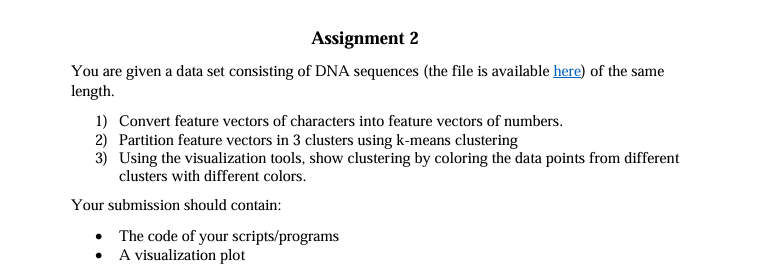

In [15]:
def read_fas_file(file_path):
    sequences = []
    current_sequence = ""
    with open(file_path, "r") as f:
        for line in f:
            line = line.strip()
            if line.startswith(">"):
                if current_sequence:
                    sequences.append(current_sequence)
                    current_sequence = ""
            else:
                current_sequence += line.upper()
        if current_sequence:
            sequences.append(current_sequence)
    return sequences

file_path = "/content/HW4.fas"
sequences = read_fas_file(file_path)
print(f"Number of sequences: {len(sequences)}")
print(f"First sequence: {sequences[0][:50]}...")


Number of sequences: 120
First sequence: CACCTACAGCTGCCCTAGTGGTGTCGCAGTTACTCCGGATCCCACAAGCT...


In [18]:
# To check whether all sequences are of same length are not
set(len(seq) for seq in sequences)

{264}

### Feature Vector Conversion

In [21]:
# TO check the unique characters in the sequence
unique_characters = set("".join(sequences))
print(f"Unique characters are : {unique_characters}")

Unique characters are : {'G', 'C', 'T', 'A'}


In [25]:
# One hot encoding to convert the "nucleotide" to vectors

import numpy as np

def one_hot_encode(sequences):
  mapping = {"A": [1, 0, 0, 0],
             "C": [0, 1, 0, 0],
             "G": [0, 0, 1, 0],
             "T": [0, 0, 0, 1]}

  encoded = []
  for seq in sequences:
    seq_encoded = []
    for nucleotide in seq:
      seq_encoded.extend(mapping[nucleotide])
    encoded.append(seq_encoded)
  return encoded

X = np.array(one_hot_encode(sequences))
print(f"Encoded Shape: {X.shape}")

Encoded Shape: (120, 1056)


### K-means Clustering

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

labels = kmeans.labels_

print(f"Cluster labels:\n{labels}")

Cluster labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


### Visualization of Clusters

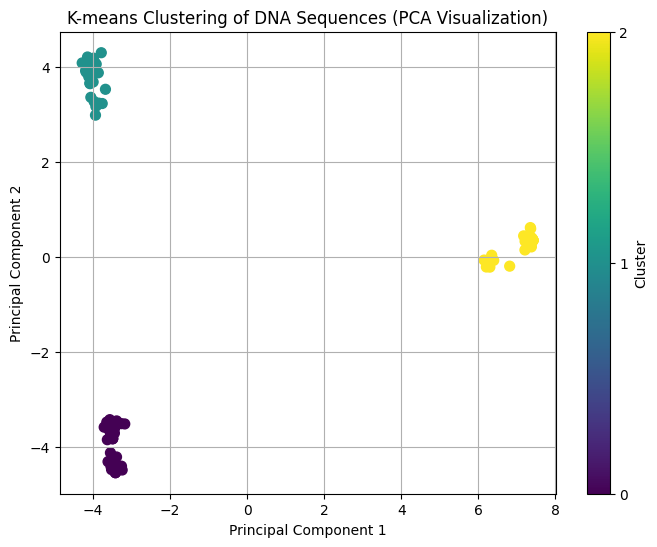

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title('K-means Clustering of DNA Sequences (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, ticks=[0, 1, 2], label='Cluster')
plt.grid(True)
plt.show()


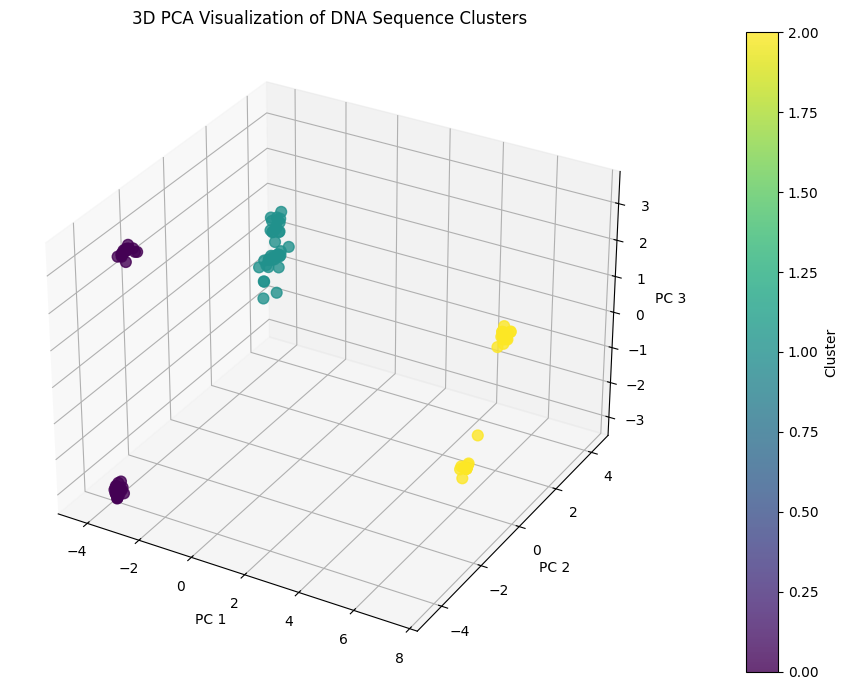

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=labels, cmap='viridis', s=60, alpha=0.8
)

ax.set_title('3D PCA Visualization of DNA Sequence Clusters')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Cluster')

plt.tight_layout()
plt.show()
